In [9]:
# Temporary sandbox notebook
############# DO NOT RUN ######################

import os
import shutil
import matplotlib.pyplot as plt 
from ultralytics import YOLO 
import cv2
from PIL import Image


# Define the source directory and target directories
source_dir = "/home/infres/lotfi-23/validation_plate-img/"
xml_target_dir = os.path.join(source_dir, "XML1")
img_target_dir = os.path.join(source_dir, "Image1")

# Create target directories if they don't exist
os.makedirs(xml_target_dir, exist_ok=True)
os.makedirs(img_target_dir, exist_ok=True)

# Iterate through files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith(".xml"):
        shutil.move(os.path.join(source_dir, filename), xml_target_dir)
    elif filename.endswith(".jpg"):
        shutil.move(os.path.join(source_dir, filename), img_target_dir)

print("Files have been successfully organized.")


Files have been successfully organized.


In [3]:

yolo_model = YOLO("/home/infres/lotfi-23/notebooks/runs/detect/train7/weights/best.pt")  # Replace with your YOLOv11 model path
results = yolo_model('/home/infres/lotfi-23/test/Images/day_14002.jpg', device='cpu') # Change with you test image
image = cv2.imread('/home/infres/lotfi-23/test/Images/day_14002.jpg')

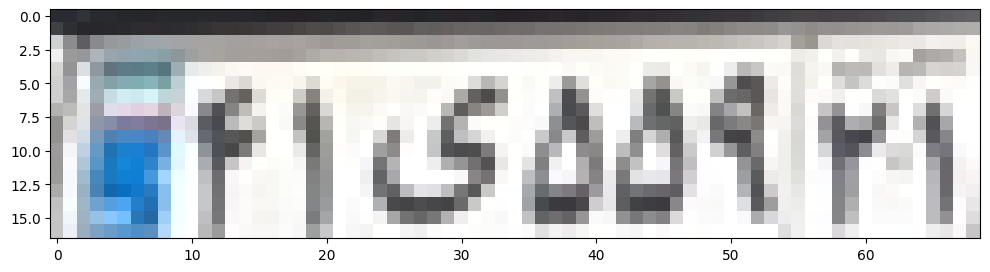

In [15]:
bbox = results[0].boxes[2].xyxy[0].cpu().numpy()
x_min, y_min, x_max, y_max = map(int, bbox)
plate_image = image[y_min:y_max, x_min:x_max]
plate_image_pil = Image.fromarray(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(12, 8))
plt.imshow(plate_image_pil)


0: 480x640 4 کل ناحیه پلاکs, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


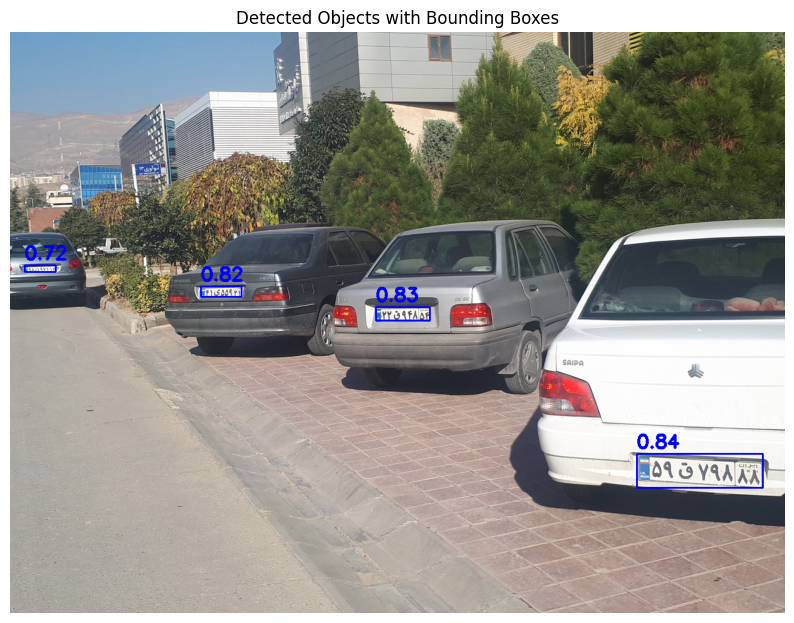

In [9]:
# Inference YOLO model

import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image_path = '/home/infres/lotfi-23/test/Images/day_14002.jpg'  # Replace with your test image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run inference
results = yolo_model(image_rgb)  # Perform inference on the image

# Visualize and draw bounding boxes
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
    confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
    class_ids = result.boxes.cls.cpu().numpy()  # Class IDs
    
    # Draw bounding boxes on the image
    for box, conf, class_id in zip(boxes, confidences, class_ids):
        x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers
        label = f"{conf:.2f}"
        
        # Draw rectangle
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)
        # Put label text
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 0, 255), 3)

# Show the resulting image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected Objects with Bounding Boxes")
plt.show()